In [3]:
import csv
import matplotlib.pyplot as plt

In [4]:
# Function to read the CSV file and convert it into a dictionary
def csv_to_dict(file_path):
    data = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(dict(row))
    return data

In [5]:
file_path = r'C:\SZvsWorkspace\PersonalProjects\Crime_Analysis\LEOKA_1995_2023\LEOKA_ASSAULT_TIME_WEAPON_INJURY_1995_2022.csv'
crime_data = csv_to_dict(file_path)
print(f'Length of data: {len(crime_data)}')
for key in crime_data[0].keys():
    print(key, crime_data[0][key])
    

Length of data: 324156
DATA_YEAR 1995
PUB_AGENCY_NAME Abbeville
PUB_AGENCY_UNIT 
STATE_ABBR GA
DIVISION_NAME South Atlantic
REGION_NAME South
AGENCY_TYPE_NAME City
POPULATION_GROUP_DESC Cities under 2,500
COUNTY_NAME WILCOX
TIME_0001_0200_CNT 0
TIME_0201_0400_CNT 0
TIME_0401_0600_CNT 0
TIME_0601_0800_CNT 0
TIME_0801_1000_CNT 0
TIME_1001_1200_CNT 0
TIME_1201_1400_CNT 0
TIME_1401_1600_CNT 0
TIME_1601_1800_CNT 0
TIME_1801_2000_CNT 0
TIME_2001_2200_CNT 0
TIME_2201_0000_CNT 0
FIREARM_INJURY_CNT 0
FIREARM_NO_INJURY_CNT 0
KNIFE_INJURY_CNT 0
KNIFE_NO_INJURY_CNT 0
HANDS_FISTS_FEET_INJURY_CNT 0
HANDS_FISTS_FEET_NO_INJURY_CNT 0
OTHER_INJURY_CNT 0
OTHER_NO_INJURY_CNT 0
LEOKA_FELONY_KILLED 0
LEOKA_ACCIDENT_KILLED 0


In [6]:
knife_inj = {}
knife_non = {}

year_list = list(range(1995,2024))
for year in year_list:
    knife_inj[year] = []
    knife_non[year] = []
print(year_list)

for item in crime_data:
    if item['KNIFE_INJURY_CNT'] != '0' and item['KNIFE_NO_INJURY_CNT'] != '0':
        pass
    elif item['KNIFE_INJURY_CNT'] != '0':
        knife_inj[int(item['DATA_YEAR'])].append(item)
    elif item['KNIFE_NO_INJURY_CNT'] != '0':
        knife_non[int(item['DATA_YEAR'])].append(item)

knife_crime = [knife_inj, knife_non]

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [7]:
print(len(year_list))

29


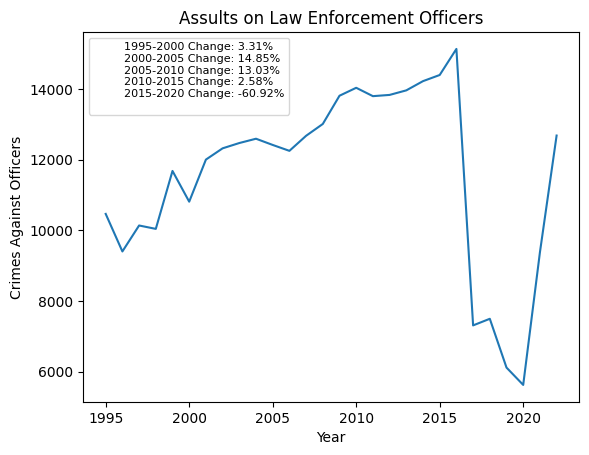

In [52]:
crimes_per_year = {}
for i in range(28):
    crimes_per_year[1995 + i] = 0

for item in crime_data:
    crimes_per_year[int(item['DATA_YEAR'])] += 1

crime_amount = []
for key in crimes_per_year.keys():
    crime_amount.append(crimes_per_year[key])

plt.title('Assults on Law Enforcement Officers')
plt.xlabel('Year')
plt.ylabel('Crimes Against Officers')
plt.plot(list(crimes_per_year.keys()), crime_amount)

row_list = ''
for i in range(1995, 2020, 5):
    row_list = row_list + (f'{i}-{i+5} Change: {round((crimes_per_year[i+5]/crimes_per_year[i] - 1)*100, 2)}%\n')
change_info = row_list

plt.plot([], [], ' ', label=change_info)
plt.legend(loc='upper left', fontsize=8)
plt.show()